In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
with open ('org_data/ClimateData.txt', 'r') as file1:
    lines=file1.readlines()
    time=[]
    temp=[]
    co2=[]
    sea_ice_ext=[]
    pH=[]
    for i in lines:
        fulllines=i.split('\t')
        time.append(fulllines[0])
        temp.append(fulllines[2])
        co2.append(fulllines[1])
        sea_ice_ext.append(fulllines[4])
        pH.append(fulllines[5].replace("\n", ""))

#replace empty values in pH data with NaN (because pH data is missing values)
pH_n=[]
for string in (pH):
    if string == '':
        string = np.nan
    pH_n.append(string)


#convert data entries from strings to floats
times = [float(string) for string in time]
co2s=[float(string) for string in co2]
temps = [float(string) for string in temp]
phs = [float(string) for string in pH_n]
sea_ice_exts = [float(string) for string in sea_ice_ext]

In [3]:
#Load in annual data
#then convert columns to lists to have a list of each type of data
with open ('org_data/ClimateDataAnnual.txt', 'r') as file2:
    lines2=file2.readlines()
    time_y=[]
    temp_y=[]
    co2_y=[]
    sea_ice_ext_y=[]
    for i in lines2:
        fulllines=i.split('\t')
        time_y.append(fulllines[0])
        temp_y.append(fulllines[2])
        co2_y.append(fulllines[1])
        sea_ice_ext_y.append(fulllines[4])


#convert data entries from strings to floats
times_y = [float(string) for string in time_y]
co2s_y=[float(string) for string in co2_y]
temps_y = [float(string) for string in temp_y]
sea_ice_exts_y = [float(string) for string in sea_ice_ext_y]

In [11]:
#make separate pH dataset because original is missing some values
#make new ph dataset without initial nan values
dictph = {'Time': times[117:], 'ph':phs[117:]}
dfph2 = pd.DataFrame(dictph)
dfphf = dfph2.interpolate()
ph_test = dfphf['ph'].tolist() 
time_test = dfphf['Time'].tolist()

#make a separate ph and matching time lists because ph is missing values
dfph1={'Time': times, 'ph': phs} #make dictionary of time and ph
dfph = pd.DataFrame(dfph1) #make dataframe
dfph.dropna(inplace=True) #remove rows with NaN values
#write the ph and times to lists with no NaN values
phs2 = dfph['ph'].tolist() 
timeph = dfph['Time'].tolist()

#make annual dataset for pH
n = 12.0
year=timeph[::12]
ph_year = [sum(phs2[i:i+12])/n for i in range(0,len(phs2),12)]
year = year[:-1]
ph_y = ph_year[:-1]

In [14]:
len(year)

26

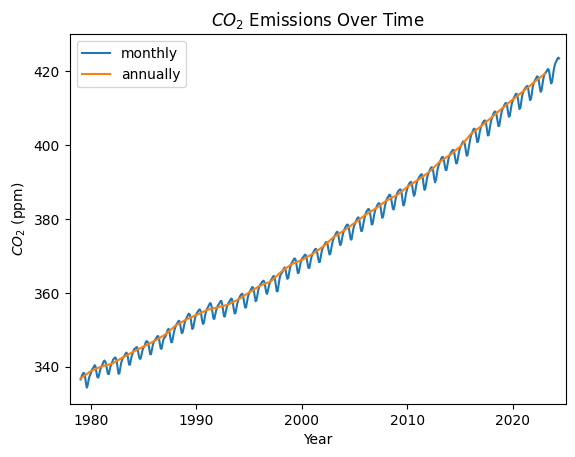

In [4]:
#plot the co2 emissions against time
plt.plot(times,co2s, label="monthly")
plt.plot(times_y,co2s_y, label="annually")
plt.xlabel('Year')
plt.ylabel('$CO_{2}$ (ppm)')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
plt.xlim(1978,2025)
plt.ylim(330,430)
plt.title("$CO_{2}$ Emissions Over Time")
plt.legend()
plt.savefig('images/co2.pdf', dpi=300, bbox_inches='tight')

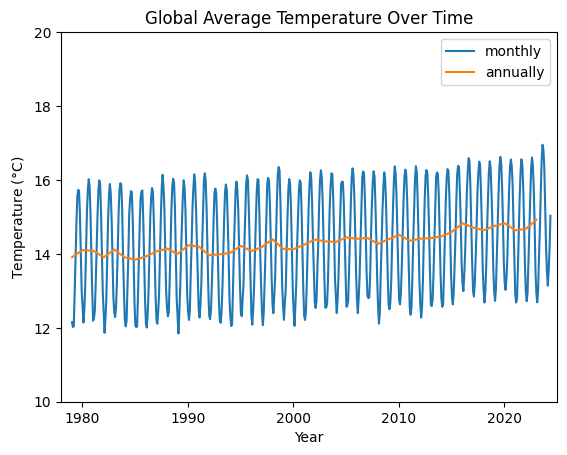

In [5]:
#plot the temperature against time
plt.plot(times,temps, label="monthly")
plt.plot(times_y,temps_y, label="annually")
plt.xlabel('Year')
plt.ylabel('Temperature ($\degree$C)')
plt.xlim(1978,2025)
plt.ylim(10,20)
plt.title("Global Average Temperature Over Time")
plt.legend()
plt.savefig('images/temp.pdf', dpi=300, bbox_inches='tight')

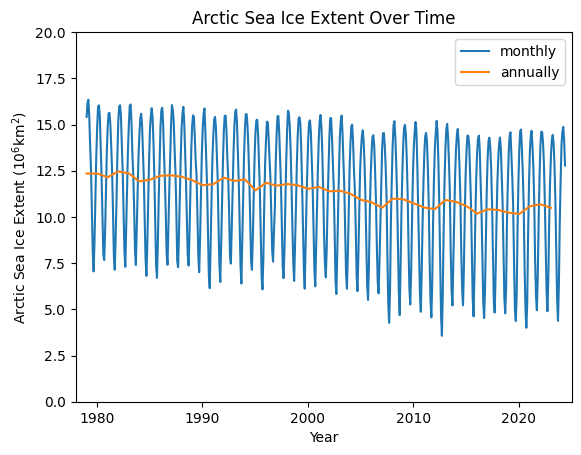

In [9]:
#plot the sea ice extent against time
plt.plot(times,sea_ice_exts,label="monthly")
plt.plot(times_y,sea_ice_exts_y,label="annually")
plt.xlabel('Year')
plt.ylabel('Arctic Sea Ice Extent ($10^6$km$^2$)')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
plt.xlim(1978,2025)
plt.ylim(0,20)
plt.title("Arctic Sea Ice Extent Over Time")
plt.legend()
plt.savefig('images/sea_ice_ext.pdf', dpi=300, bbox_inches='tight')

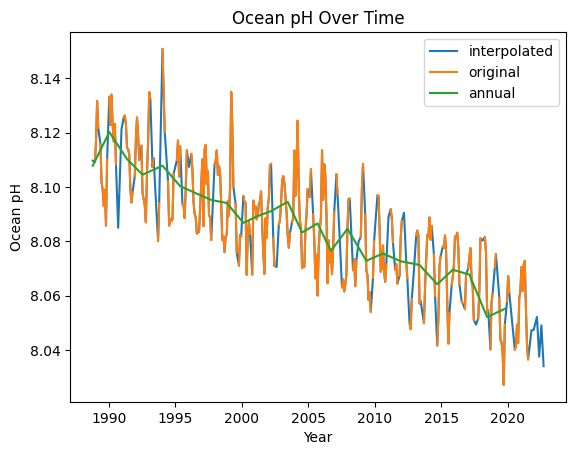

In [19]:
#plot the ocean pH against time
#plt.plot(timeph,phs,label="interpolated")
plt.plot(timeph,phs2,label = "interpolated")
plt.plot(times,phs,label="original")
plt.plot(year,ph_y,label = "annual")
plt.xlabel('Year')
plt.ylabel('Ocean pH')
#plt.setp(plot.axes.get_xticklabels()[::10], visible=True)
#plt.xlim(1978,2025)
#plt.ylim(0,18)
plt.title("Ocean pH Over Time")
plt.legend()
plt.savefig('images/ph.pdf', dpi=300, bbox_inches='tight')

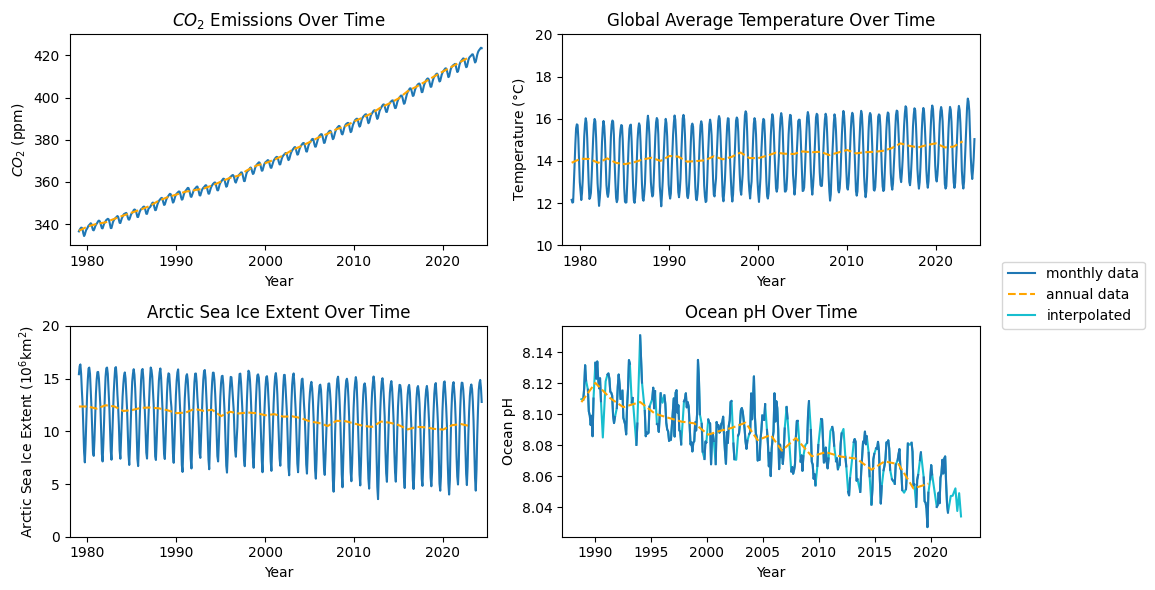

<Figure size 2000x1200 with 0 Axes>

In [34]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
plt.figure(figsize=(20,12))
axs[0, 0].plot(times,co2s, color='tab:blue', label="monthly data")
axs[0, 0].plot(times_y,co2s_y, color='orange', linestyle='dashed', label="annual data")
axs[0, 0].set_xlabel('Year')
axs[0, 0].set_ylabel('$CO_{2}$ (ppm)')
axs[0, 0].set_xlim(1978,2025)
axs[0, 0].set_ylim(330,430)
axs[0, 0].set_title("$CO_{2}$ Emissions Over Time")
#axs[0, 0].legend()

axs[0, 1].plot(times,temps, color='tab:blue')
axs[0, 1].plot(times_y,temps_y, linestyle='dashed', color='orange')
axs[0, 1].set_xlabel('Year')
axs[0, 1].set_ylabel('Temperature ($\degree$C)')
axs[0, 1].set_xlim(1978,2025)
axs[0, 1].set_ylim(10,20)
axs[0, 1].set_title("Global Average Temperature Over Time")
#axs[0, 1].legend()

axs[1, 0].plot(times,sea_ice_exts,color = 'tab:blue')
axs[1, 0].plot(times_y,sea_ice_exts_y, linestyle='dashed', color = 'orange')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Arctic Sea Ice Extent ($10^6$km$^2$)')
axs[1, 0].set_xlim(1978,2025)
axs[1, 0].set_ylim(0,20)
axs[1, 0].set_title("Arctic Sea Ice Extent Over Time")
#axs[1, 0].legend()

axs[1, 1].plot(timeph,phs2, color = 'tab:cyan', label = "interpolated")
axs[1, 1].plot(times,phs, color='tab:blue')
axs[1, 1].plot(year,ph_y, color = 'orange', linestyle='dashed')
axs[1, 1].set_xlabel('Year')
axs[1, 1].set_ylabel('Ocean pH')
axs[1, 1].set_title("Ocean pH Over Time")
#axs[1, 1].legend()

fig.legend(loc='center left', bbox_to_anchor=(1, 0.5))
fig.tight_layout()
fig.savefig('images/generaldata.pdf', dpi=300, bbox_inches='tight')
